#  工作计划
1. 研究拟合中误差的使用方法
2. 苑老师的拟合建议
3. 陈丙秋的细分方法
4. 阅读相关文献

# 其他计划
1. 运动
2. 恒星射电辐射机制论文
3. 练习英语
4. 其他出国准备（做饭、硬件、换钱、缝书包、礼物）



In [3]:
cd E:\BNUCLOUD\work\git\Scripts\SNR13

E:\BNUCLOUD\work\git\Scripts\SNR13


In [4]:
import SNR13
import _pickle
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as pjoin
from collections import deque
from SNR13 import radioar, dis_ext
import emcee

In [5]:
xr, yr, image_data =  radioar.readfits('snr169')
xgrid, ygrid, ar, realdis = radioar.readsnrsav('snr169')

In [6]:
for i in range(1):
    cloudn = i+1
    dis_ext.datainborder('snr169', cloudn = cloudn)
    datapath = pjoin('..', '..', 'Data', 'extin3d', 'results', '{0}_diar_{1}.pkl'.format('snr169', cloudn))
    datafile = open(datapath, 'rb')
    data = _pickle.load(datafile)
    dis, ar = data.dis, data.ar
    datafile.close()
    plt.plot(dis,ar,'r.')
    #pfit, perror = dis_ext.disarMCMCall('snr169', strategy='MC', cloudn = i+1)

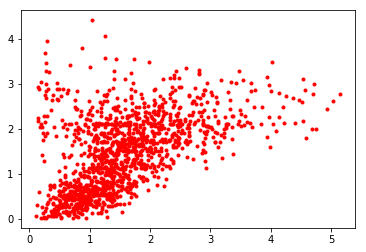

In [7]:
plt.show()

In [8]:
dis2 = dis[np.logical_or(dis > 1,ar < 0.5+1.5*dis)]
ar2 = ar[np.logical_or(dis > 1,ar < 0.5+1.5*dis)]

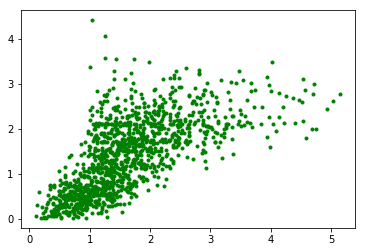

In [9]:
plt.plot(dis2,ar2,'g.')
plt.show()

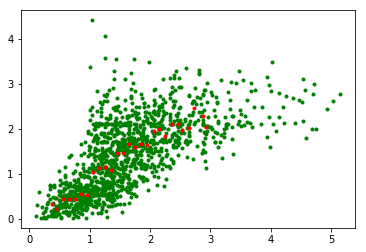

In [10]:
def binmed(data, start, end, length):
    data=np.array([dis2,ar2])
    bin_number = int((end - start) // length)
    dismedlist = deque([])
    armedlist = deque([])
    for i in np.arange(bin_number):
            index = np.logical_and(data[0] > start + i * length, data[0] < start + (i + 1) * length)
            if np.count_nonzero(index) >= 1:
                binar = data[1][index]
                bindis = data[0][index]
                dismed = np.median(bindis)
                armed = np.median(binar)
            else:
                dismed = []
                armed = []
            dismedlist.append(dismed)
            armedlist.append(armed)
    return dismedlist, armedlist

dismedlist, armedlist = binmed([dis2,ar2], 0.3, 3.0, 0.1)
plt.plot(dis2,ar2,'g.',dismedlist,armedlist,'r.')
plt.show()

跳变明显，但这个跳变也明显是与巨星剔除线相关的

In [1]:
from numpy import exp, sin

In [16]:
def lnlike(theta, x, y, yerr, D):
    a, b, d0, d_ar= theta
    model = a * x + b * x ** 2 + d_ar / 2.0 * (1 + erf((x - d0) / np.sqrt(2) / (D/60./360*2*np.pi)/d0))
    return np.sum(np.log(1 / (np.sqrt(2 * np.pi) * yerr)) + (-(y - model) ** 2 / (2 * yerr ** 2)))

def lnprior(theta):
    a, b, d0, d_ar= theta
    if 0 < a < 3 and -0.2 < b < 0.5 and 0.8 < d0 < 2.0 and 0 < d_ar < 3. :
        return 0.0
    return -np.inf

def lnprob(theta, x, y, yerr, D):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr, D)

In [11]:
dismedlist

deque([0.36797518,
       0.44525284,
       0.55304551,
       0.64946926,
       0.7567572,
       0.84840584,
       0.95557952,
       1.0586686,
       1.1558459,
       1.2516837,
       1.3520325,
       1.4462521,
       1.5530541,
       1.6533115,
       1.7471908,
       1.8575722,
       1.9506996,
       2.0584619,
       2.1515303,
       2.2424016,
       2.3581755,
       2.457777,
       2.5369778,
       2.6414995,
       2.7374132,
       2.8733928,
       2.9275179])

In [14]:
#def MCMCfit(name, dis, ar, ndim, nwalkers, start, end, step, p0, diameter):
name, dis, ar, ndim, nwalkers, start, end, step, p0, diameter = 'snr169', dismedlist, armedlist, 4, 100, 0.3, 3.0, 0.1, [0.81, -0.07, 1.5, 0.2], 45
yerr = np.zeros_like(dis)
D = np.zeros_like(dis)
yerr[:] = 0.15
D[:] = diameter
    

In [17]:
pos = [np.array(p0) + 1e-2*np.random.randn(ndim) for i in range(nwalkers)]
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(dis, ar, yerr, D))
sampler.run_mcmc(pos, 2000)


emcee: Exception while calling your likelihood function:
  params: [ 0.79462055 -0.07773164  1.49784785  0.19644351]
  args: (deque([0.36797518, 0.44525284, 0.55304551, 0.64946926, 0.7567572, 0.84840584, 0.95557952, 1.0586686, 1.1558459, 1.2516837, 1.3520325, 1.4462521, 1.5530541, 1.6533115, 1.7471908, 1.8575722, 1.9506996, 2.0584619, 2.1515303, 2.2424016, 2.3581755, 2.457777, 2.5369778, 2.6414995, 2.7374132, 2.8733928, 2.9275179]), deque([0.34, 0.22, 0.44, 0.44, 0.44, 0.56, 0.51999998, 1.04, 1.12, 1.16, 1.0799999, 1.4599999, 1.47, 1.66, 1.5999999, 1.67, 1.6399999, 1.9599999, 2.0, 1.8399999, 2.1099999, 2.0999999, 1.9799999, 2.02, 2.4699998, 2.28, 2.05]), array([ 0.15000001,  0.15000001,  0.15000001,  0.15000001,  0.15000001,
        0.15000001,  0.15000001,  0.15000001,  0.15000001,  0.15000001,
        0.15000001,  0.15000001,  0.15000001,  0.15000001,  0.15000001,
        0.15000001,  0.15000001,  0.15000001,  0.15000001,  0.15000001,
        0.15000001,  0.15000001,  0.15000001,  0.

Traceback (most recent call last):
  File "C:\Users\Robin\Anaconda3\Lib\site-packages\emcee\ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-16-66db4a92268d>", line 16, in lnprob
    return lp + lnlike(theta, x, y, yerr, D)
  File "<ipython-input-16-66db4a92268d>", line 3, in lnlike
    model = a * x + b * x ** 2 + d_ar / 2.0 * (1 + erf((x - d0) / np.sqrt(2) / (D/60./360*2*np.pi)/d0))
TypeError: 'numpy.float64' object cannot be interpreted as an integer


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
samples = sampler.chain[:, 200:, :].reshape((-1, ndim))
results = np.percentile(samples, [16, 50, 84], axis = 0)
a, b, d0, d_ar = results[1]
disfit = np.array([i+step/2 for i in range(start, end, step)])
arfit = a * dismed + b * dismed ** 2 + d_ar / 2.0 * (1 + erf((dismed - d0) / np.sqrt(2) / (diameter/60./360*2*np.pi)/d0))

In [38]:
disfit, arfit = MCMCfit('snr169', dismedlist, armedlist, 4, 100, 0.3, 3.0, 0.1, [0.81, -0.07, 1.5, 0.2], 45)

emcee: Exception while calling your likelihood function:
  params: [ 0.80495496 -0.06340413  1.48732313  0.19447385]
  args: (deque([0.36797518, 0.44525284, 0.55304551, 0.64946926, 0.7567572, 0.84840584, 0.95557952, 1.0586686, 1.1558459, 1.2516837, 1.3520325, 1.4462521, 1.5530541, 1.6533115, 1.7471908, 1.8575722, 1.9506996, 2.0584619, 2.1515303, 2.2424016, 2.3581755, 2.457777, 2.5369778, 2.6414995, 2.7374132, 2.8733928, 2.9275179]), deque([0.34, 0.22, 0.44, 0.44, 0.44, 0.56, 0.51999998, 1.04, 1.12, 1.16, 1.0799999, 1.4599999, 1.47, 1.66, 1.5999999, 1.67, 1.6399999, 1.9599999, 2.0, 1.8399999, 2.1099999, 2.0999999, 1.9799999, 2.02, 2.4699998, 2.28, 2.05]), array([ 0.15000001,  0.15000001,  0.15000001,  0.15000001,  0.15000001,
        0.15000001,  0.15000001,  0.15000001,  0.15000001,  0.15000001,
        0.15000001,  0.15000001,  0.15000001,  0.15000001,  0.15000001,
        0.15000001,  0.15000001,  0.15000001,  0.15000001,  0.15000001,
        0.15000001,  0.15000001,  0.15000001,  0.

Traceback (most recent call last):
  File "C:\Users\Robin\Anaconda3\Lib\site-packages\emcee\ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-24-66db4a92268d>", line 16, in lnprob
    return lp + lnlike(theta, x, y, yerr, D)
  File "<ipython-input-24-66db4a92268d>", line 3, in lnlike
    model = a * x + b * x ** 2 + d_ar / 2.0 * (1 + erf((x - d0) / np.sqrt(2) / (D/60./360*2*np.pi)/d0))
TypeError: 'numpy.float64' object cannot be interpreted as an integer


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [1]:
dismedlist, armedlist

NameError: name 'dismedlist' is not defined